In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
def export_figure (title):
    plt.tight_layout()
    plt.savefig(os.path.join("figs", title + ".eps"))
    plt.show()

In [3]:
all_electives =  pd.read_csv(os.path.join("curriculum_content", "all_electives.csv"))
institution_elective_count = all_electives.groupby('institution')['elective'].count()
institution_elective_count['CAU_Germany']

13

In [16]:
code_set = pd.read_csv(os.path.join("curriculum_content", "ACM_2023_CAH_codes.csv"), dtype="string")
code_set = code_set.rename(columns={'Abbrev': 'code'})
acm_code_set = code_set[~(code_set.Area == "Non-CS application")]
acm_code_list = list(acm_code_set['code'])
cah_code_set = code_set[code_set.Area == "Non-CS application"]
cah_code_list = list(cah_code_set['code'])
print(acm_code_set.to_latex(index=False))
print(cah_code_set.to_latex(index=False))

\begin{tabular}{lll}
\toprule
                                   Title & code &         Area \\
\midrule
               Algorithms and Complexity &   AL &     Software \\
           Architecture and Organization &   AR &      Systems \\
                 Artificial Intelligence &   AI & Applications \\
                         Data Management &   DM &      Systems \\
    Foundations of Programming Languages &  FPL &     Software \\
     Graphics and Interactive Techniques &  GIT & Applications \\
              Human-Computer Interaction &  HCI & Applications \\
Mathematical and Statistical Foundations &  MSF & Underpinning \\
            Networking and Communication &   NC &      Systems \\
                       Operating Systems &   OS &      Systems \\
      Parallel and Distributed Computing &  PDC &      Systems \\
                                Security &  SEC &      Systems \\
     Society, Ethics and Professionalism &  SEP & Underpinning \\
       Software Development Fundament

/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_66280/3152829440.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(acm_code_set.to_latex(index=False))
/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_66280/3152829440.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(cah_code_set.to_latex(index=False))


In [17]:
dataset_codes = pd.read_csv(os.path.join("curriculum_content","coded","stage2_codes_columns.csv"))
dataset_codes

,Unnamed: 0,elective,institution,title,HCI,NC,PDC,SF,DM,SDF,...,01,24,16,07,08,04,OS,AI,AR,SEC
0,0,1DL034,Uppsala_Sweden,Introduction to Machine Learning,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
1,1,1DL231,Uppsala_Sweden,Algorithms and Data Structures II,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1DL311,Uppsala_Sweden,Semantics of Programming Languages,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1DT075,Uppsala_Sweden,Cryptology,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,4,1TD062,Uppsala_Sweden,High Performance Programming,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,254,inf-EAeS,CAU_Germany,Methods for Efficient Similarity Search in Lar...,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,255,inf-EERP,CAU_Germany,Implementation of ERP systems,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,256,inf-EnlOpt,CAU_Germany,Introduction to Nonlinear Optimization,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,257,inf-IoT,CAU_Germany,Internet of Things and Wireless Networks,0.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
dataset_codes_binary = dataset_codes[['institution','elective']]
for column in list(code_set['code']):
    if column in dataset_codes.columns:
        dataset_codes_binary[column] = dataset_codes[column] >=4
    else:
        print ("No topic codes for " + column)
    
dataset_codes_binary.replace({True: 1, False: 0}, inplace=True)

dataset_codes_binary.to_csv(os.path.join("curriculum_content", "coded", "stage2_coded_binary.csv"))

No topic codes for 05
No topic codes for 06
No topic codes for 12
No topic codes for 20


/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_66280/1277088463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_codes_binary[column] = dataset_codes[column] >=4
/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_66280/1277088463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_codes_binary[column] = dataset_codes[column] >=4
/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_66280/1277088463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

In [6]:
# heatmap of topics against institution
institution_codes = dataset_codes.groupby('institution').sum()
code_headings = list(institution_codes.columns)
institution_codes = institution_codes.join(institution_elective_count)

/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_66280/2371714596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  institution_acm_codes[acm_code_list] = institution_codes[acm_code_list].div(institution_codes['elective'], axis=0)


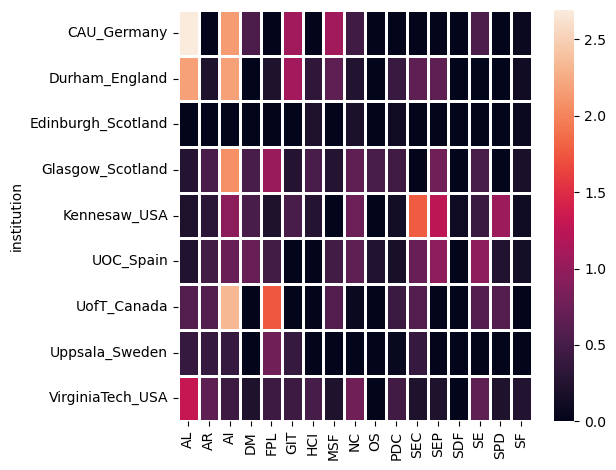

In [7]:
institution_acm_codes = institution_codes[acm_code_list + ['elective']]
institution_acm_codes[acm_code_list] = institution_codes[acm_code_list].div(institution_codes['elective'], axis=0)
sns.heatmap(institution_acm_codes[acm_code_list], linewidths=1)
export_figure('acm_institution_heatmap')

/var/folders/my/th4q3hxs0b7c1t1qlv0j2dtm0000gp/T/ipykernel_66280/992147040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  institution_cah_codes[selected_cah_codes] = institution_codes[selected_cah_codes].div(institution_codes['elective'], axis=0)


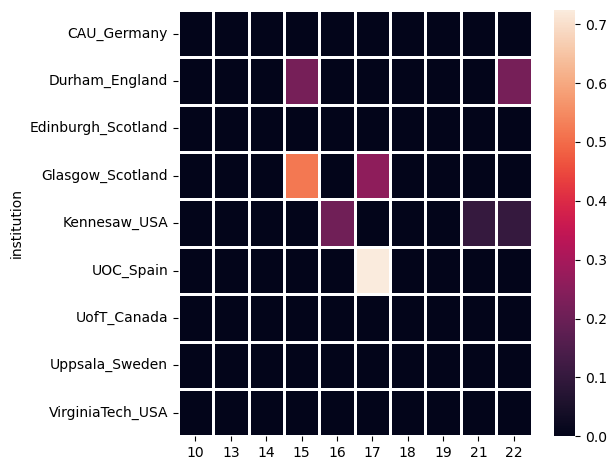

In [8]:
selected_cah_codes = [code for code in cah_code_list if code in institution_codes.columns]
institution_cah_codes = institution_codes[selected_cah_codes + ['elective']]
institution_cah_codes[selected_cah_codes] = institution_codes[selected_cah_codes].div(institution_codes['elective'], axis=0)
sns.heatmap(institution_cah_codes[selected_cah_codes], linewidths=1)
export_figure('cah_institution_heatmap')

In [9]:
# bubble chart of topics, size = #codings, distance ~ co-selection
# or heat map of co-selection
# table of number of institutions, number of students, number of module selections
# table of ACM and CAH codings
# bar chart with error bars for topic and non-topic posteriors
# structure of Bayesian model
# graph of elective odds ratios marked with significance
# table of module title and codings for most significant/largest effect sizes
# agreement by topic (pilot and final)